In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [ ]:
#

In [3]:
#dataset of addresses in Finland
location = "datasets/hurricaneMichael.csv"

#load data into dataframe
#seperator between values in file is a semicolon
df = pd.read_csv(location)
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [4]:
#make a new column to hold the longitude & latitude as a list
df['Coordinates'] = list(df[['Long', 'Lat']].values)

In [5]:
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[86.9, 18.6]"


In [6]:
#convert the coordinates to a geolocation type
df['Coordinates'] = df['Coordinates'].apply(Point)

In [7]:
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (86.90000000000001 18.6)


In [9]:
#coordinates column with geolocation data is just a regular pandas Series type
type(df['Coordinates'])

pandas.core.series.Series

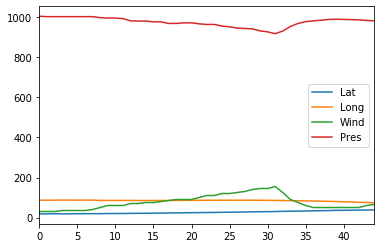

In [13]:
df.plot()

In [19]:
df['Long'] = 0 - df['Long']

In [20]:
df

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (86.90000000000001 18.6)
5,3A,10/07/2018 08:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 07:53,Brown,POINT (86.8 18.9)
6,4,10/07/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 10:53,Brown,POINT (86.90000000000001 19.2)
7,4A,10/07/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/07/2018 13:44,Brown,POINT (86.90000000000001 19.2)
8,5,10/07/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/07/2018 17:02,Brown,POINT (85.5 19.2)
9,5A,10/07/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 19:41,Stewart,POINT (85.40000000000001 19.9)


In [ ]:
#Load a Json file and  plot the states

In [10]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "datasets/datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
mapDf = gpd.read_file(filepath)
mapDf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


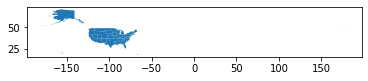

In [11]:
mapDf.plot()

In [12]:
mapDf

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924200000001 42.008065, -71.79..."
7,0400000US10,10,Delaware,,1948.543,"(POLYGON ((-75.564927 39.583248, -75.576271000..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03859799999999 38.791513, -77.03..."
9,0400000US12,12,Florida,,53624.759,"(POLYGON ((-82.821585 27.964443, -82.829801 27..."


In [17]:
mapExcepDf = mapDf.loc[mapDf['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

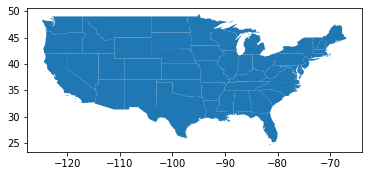

In [18]:
mapExcepDf.plot()